## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **housing prices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.


In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from sklearn import linear_model
import statsmodels.api as sm

#new librarys for this assignment 
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


import warnings 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')



## load the house price data set 

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

#create connection to database based on credentials 
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# create a dataframe from the imported data
house_price_data = pd.read_sql_query('select * from houseprices',con=engine)

#dispose of the connection 
engine.dispose()

## Split the data into train and test sets.


In [14]:
#house_price_data.columns

In [15]:
house_price_data['has_central_air'] =pd.get_dummies(house_price_data['centralair'], drop_first=True )

house_price_data['total_baths'] = house_price_data.fullbath + house_price_data.bsmtfullbath +.5*house_price_data.halfbath+.5*house_price_data.bsmthalfbath

house_price_data.head()


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,has_central_air,total_baths
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,1,3.5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,1,2.5
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,3.5
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,2.0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,1,3.5


In [16]:
# Y is the target variable, in other words what are trying to predict.
Y = house_price_data['saleprice']

# X is the feature set we are using to predict the medical costs
X = house_price_data[['lotarea','grlivarea','yearbuilt','garagearea','overallcond','total_baths']]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


## Train Previous Model on the training set

In [20]:
X_train = sm.add_constant(X_train)

In [21]:
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     468.1
Date:                Mon, 27 Jan 2020   Prob (F-statistic):          1.00e-305
Time:                        17:02:45   Log-Likelihood:                -14108.
No. Observations:                1168   AIC:                         2.823e+04
Df Residuals:                    1161   BIC:                         2.826e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.782e+06   1.12e+05    -15.849      0.000      -2e+06   -1.56e+06
lotarea         0.5513      0.122      4.518      0.000       0.312       0.791
grlivarea      72.4277      3.228     22.436      0.000      66.094      78.761
yearbuilt     880.8684     56.964     15.464      0.000     769.104     992.633
garagearea     76.8116      7.379     10.410      0.000      62.334      91.289
overallcond  9954.2576   1209.693      8.229      0.000    7580.828    1.23e+04
total_baths  8556.9268   2316.100      3.695      0.000    4012.718    1.31e+04
==============================================================================
Omnibus:                      303.136   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19938.090
Skew:                          -0.019   Prob(JB):                         0.00
Kurtosis:                      23.241   Cond. No.                     1.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here we have an R value that is suspiciously High 

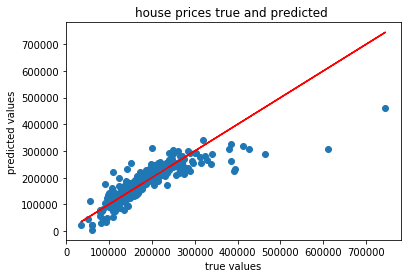

MAE = 27379.147379039958
MSE = 1918057751.1131115
RMSE = 43795.63621084995
MAPE = 15.72255581703729


In [26]:
X_test = sm.add_constant(X_test)



y_preds = results.predict(X_test)

plt.scatter(y_test,y_preds)
plt.plot(y_test,y_test,color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('house prices true and predicted ')
plt.show()

print ('MAE = {}'.format(mean_absolute_error(y_test, y_preds)))
print ('MSE = {}'.format(mse(y_test, y_preds)))
print ('RMSE = {}'.format(rmse(y_test, y_preds)))
print ('MAPE = {}'.format(np.mean(np.abs((y_test - y_preds)/y_test))*100))





I would say that this looks like its getting somewehere however in examining the mean Absolute Error the pricese are on average off by ~27 thousand dollers so this could obviously use improvment

In [101]:
house_price_data.landslope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: landslope, dtype: int64

In [64]:
house_price_data[['Gtl','Mod','Sev']] = pd.get_dummies(house_price_data.landslope)

#pd.get_dummies(house_price_data.landslope)
house_price_data.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,has_central_air,total_baths,Gtl,Mod,Sev
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500,1,3.5,1,0,0
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500,1,2.5,1,0,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500,1,3.5,1,0,0
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000,1,2.0,1,0,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000,1,3.5,1,0,0


In [65]:
house_price_data['lotarea_GtlSlope']=house_price_data['lotarea']*house_price_data['Gtl']
house_price_data['lotarea_ModSlope']=house_price_data['lotarea']*house_price_data['Mod']
house_price_data['lotarea_SevSlope']=house_price_data['lotarea']*house_price_data['Sev']

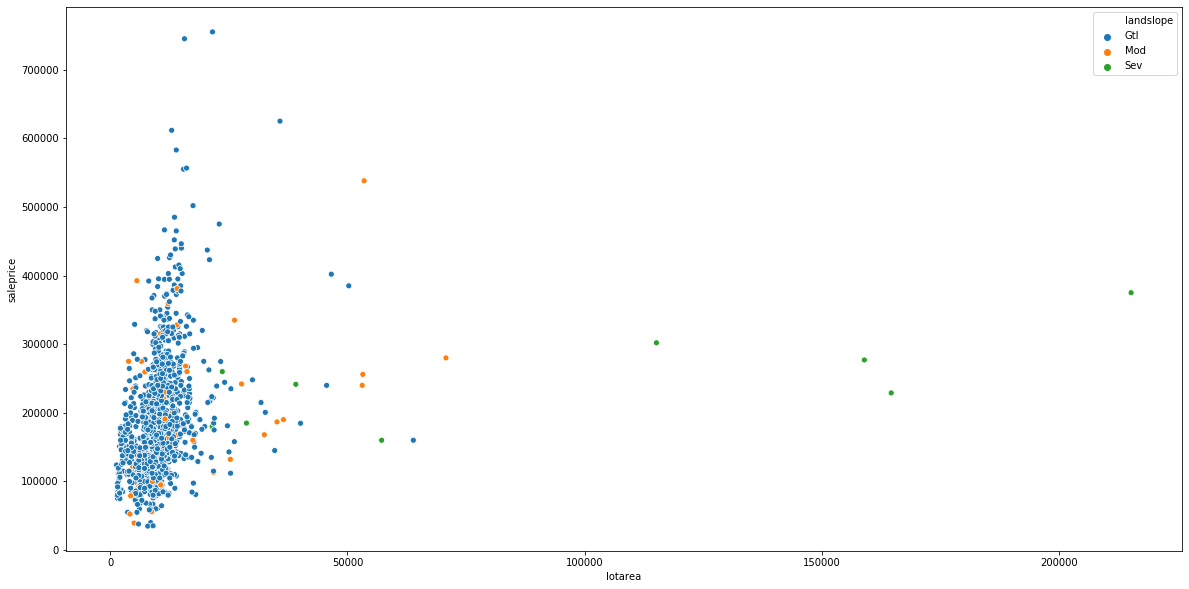

In [115]:
plt.figure(figsize= (20,10))

sns.scatterplot(x='lotarea',y='saleprice',hue ='landslope' , data=house_price_data)

# catagories that account for outliers in lot/ price 
# street 1 ,land contour acount for all outliers but some normal, lot frontage may be a descent indicator
# land slope is a great indicator

#'landcontour',shape='
#ax = sns.scatterplot(x="total_bill", y="tip",hue="time", style="time", data=tips)

In [ ]:
in the plot above we can see that the slope effects the value of the land. 

In [93]:
# Y is the target variable, in other words what are trying to predict.
W = house_price_data['saleprice']

# X is the feature set we are using to predict the medical costs
V = house_price_data[['lotarea_GtlSlope','lotarea_ModSlope','lotarea_SevSlope','grlivarea','yearbuilt','garagearea','overallcond','total_baths']]


In [120]:
V_train, V_test, W_train, W_test = train_test_split(V, W, test_size = 0.5, random_state = 24)

print("The number of observations in training set is {}".format(V_train.shape[0]))
print("The number of observations in test set is {}".format(V_test.shape[0]))

The number of observations in training set is 730
The number of observations in test set is 730


In [121]:
V_train = sm.add_constant(V_train)

In [122]:
results = sm.OLS(W_train, V_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     236.6
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          6.55e-196
Time:                        15:24:52   Log-Likelihood:                -8782.7
No. Observations:                 730   AIC:                         1.758e+04
Df Residuals:                     721   BIC:                         1.762e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.809e+06   1.33e+05    -13.567      0.000   -2.07e+06   -1.55e+06
lotarea_GtlSlope     0.9567      0.368      2.599      0.010       0.234       1.680
lotarea_ModSlope     1.3318      0.418      3.186      0.002       0.511       2.153
lotarea_SevSlope     0.3214      0.159      2.027      0.043       0.010       0.633
grlivarea           70.5322      4.082     17.280      0.000      62.519      78.546
yearbuilt          894.3890     67.591     13.232      0.000     761.690    1027.088
garagearea          83.4725      9.406      8.874      0.000      65.006     101.939
overallcond       1.066e+04   1408.045      7.567      0.000    7890.783    1.34e+04
total_baths       5803.4832   2916.724      1.990      0.047      77.197    1.15e+04
==============================================================================
Omnibus:                      218.176   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4629.277
Skew:                           0.801   Prob(JB):                         0.00
Kurtosis:                      15.232   Cond. No.                     9.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

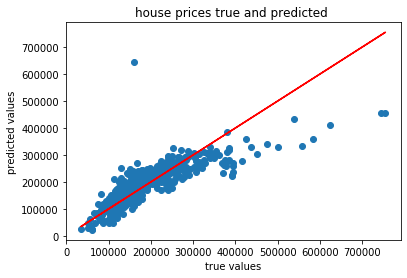

MAE = 27947.456867287667
MSE = 2027912383.1159384
RMSE = 45032.3481856758
MAPE = 15.64297226014525


In [123]:

V_test = sm.add_constant(V_test)



W_preds = results.predict(V_test)

plt.scatter(W_test,W_preds)
plt.plot(W_test,W_test,color='red')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('house prices true and predicted ')
plt.show()

print ('MAE = {}'.format(mean_absolute_error(W_test, W_preds)))
print ('MSE = {}'.format(mse(W_test, W_preds)))
print ('RMSE = {}'.format(rmse(W_test, W_preds)))
print ('MAPE = {}'.format(np.mean(np.abs((W_test - W_preds)/W_test))*100))




The new variable I created apears to be working slightly better in some cases however I need more data to prove that it works with only 13 data points for properties with severe slope there isnt enough data to break it into test and train sets. however this interaction variable of lot area and land slope seems to be promising 